In [100]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [102]:
# Generate summary statistics
market_data_df.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

### Prepare the Data

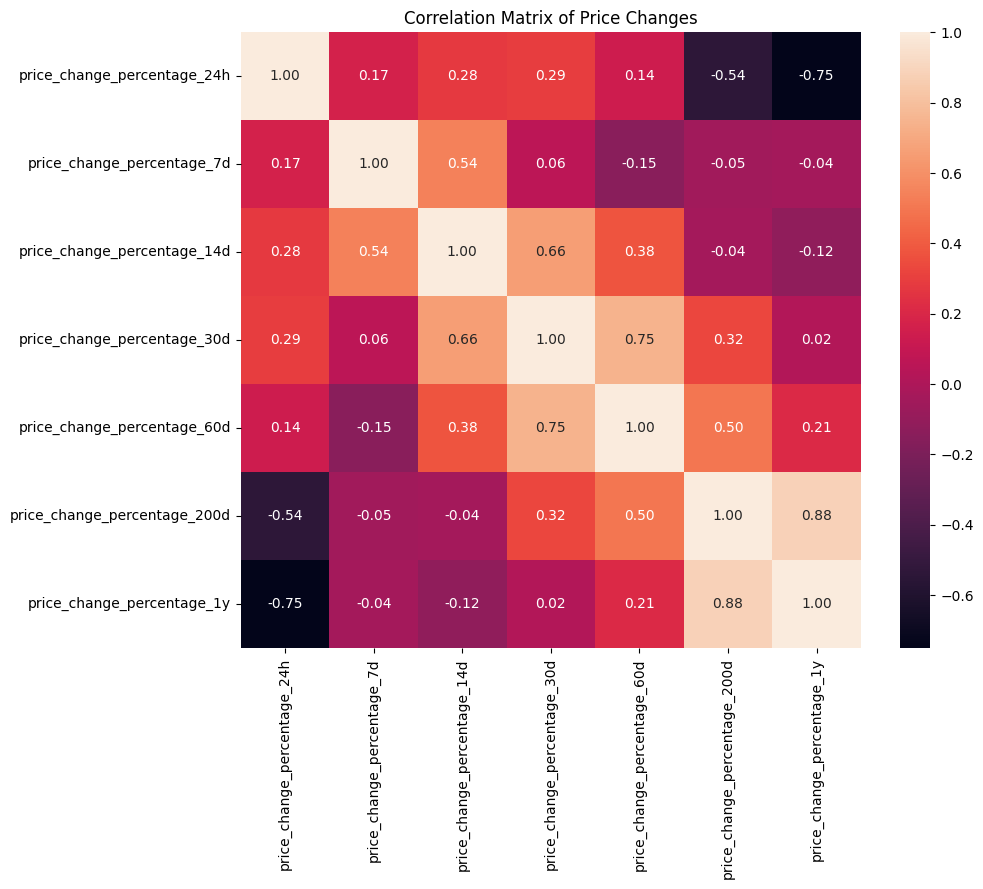

In [103]:
# Calculate descriptive statistics
stats = market_data_df.describe()

# Correlation matrix
correlation = market_data_df.corr()

# Visualization of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Price Changes")
plt.show()

In [104]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)


In [105]:
# Create a DataFrame with the scaled data

# Step 4: Create a new DataFrame with scaled data and set 'coin_id' as index
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())
summary_statistics_scaled = scaled_df.describe()

# Display summary statistics
print("\nSummary Statistics of Scaled Data:")
print(summary_statistics_scaled)



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [106]:
scaled_df.sample(5)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
ontology                                -0.409044                   -0.906963   
celsius-degree-token                     1.045530                   -0.618328   
binance-usd                              0.061339                   -0.706669   
ethereum                                 0.185446                    0.934445   
huobi-token                             -0.052032                   -0.457229   

                      price_change_percentage_14d  \
coin_id                                             
ontology                                -1.298986   
celsius-degree-token                     2.907054   
binance-usd                             -0.015321   
ethereum                                 0.558692   
huobi-token                              0.032522   

                      price_change_percentage_30d  \
coin_id                                             
ontology                                -1.393153   
celsius-degree-token                     5.351455   
binance-usd                             -0.058694   
ethereum                                -0.054341   
huobi-token                             -0.184489   

                      price_change_percentage_60d  \
coin_id                                             
ontology                                -0.696937   
celsius-degree-token                     4.769913   
binance-usd                              0.004017   
ethereum                                -0.273483   
huobi-token                             -0.070809   

                      price_change_percentage_200d  price_change_percentage_1y  
coin_id                                                                         
ontology                                 -0.422835                   -0.292344  
celsius-degree-token                      3.148875                    1.348488  
binance-usd                              -0.550003                   -0.281963  
ethereum                                 -0.115759                   -0.199352  
huobi-token                              -0.451982                   -0.262140

In [107]:
# Step 2: Copy the cryptocurrency names (coin_id)
crypto_names = scaled_df.index.tolist()  # This creates a list of cryptocurrency names

# Step 3: Display sample data
sample_data = scaled_df.sample(5)  # Display a random sample of 5 rows

# Output results
print("Cryptocurrency Names:")
print(crypto_names)

print("\nSample Data:")
print(sample_data)

Cryptocurrency Names:
['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte']

Sample Data:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
leo-token                           0.051758                   -0.928381   
okb                                -0.923203                   -1.437359   
binancecoin                         0.891871                    1.327295   
bitcoin-cash-sv                     0.448952                   -0.190684   
tron           

### Find the Best Value for k Using the Original Scaled DataFrame.

Elbow Curve DataFrame:
     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


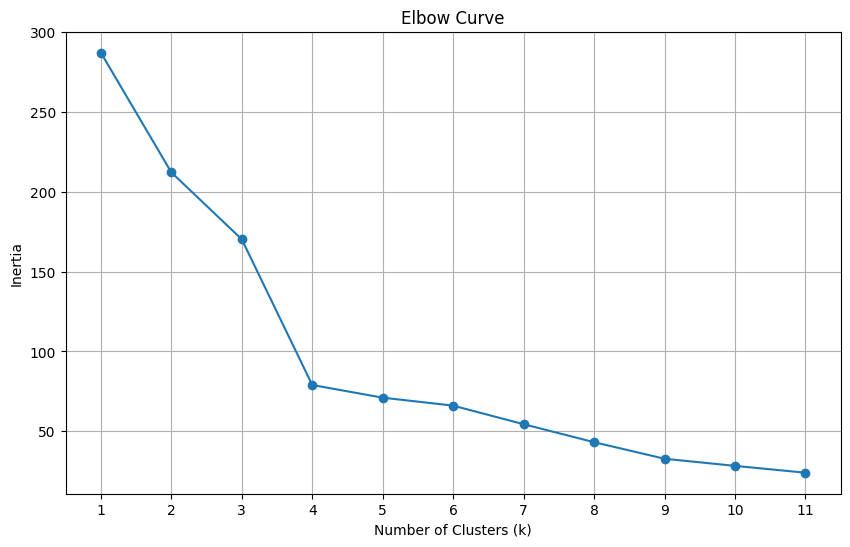

In [108]:
# Step 1: Create a list with the number of k-values to try (from 1 to 11)
k_values = range(1, 12)

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)

    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Step 5: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Elbow Curve DataFrame:")
print(elbow_df)

# Optional: Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()
plt.show()

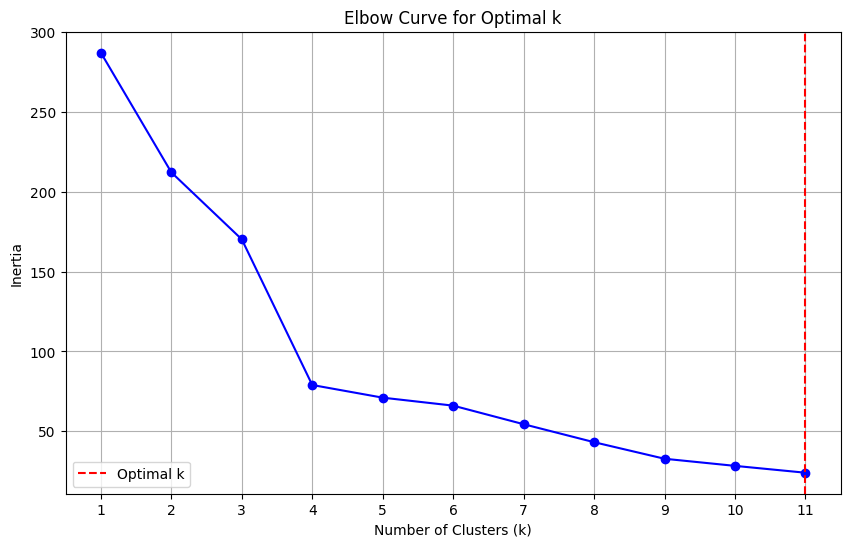

In [109]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


# Step 1: Create a list with the number of k-values to try (from 1 to 11)
k_values = range(1, 12)

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)

    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia_values})

# Step 5: Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()

# Find the index of the minimum inertia value using .idxmin()
optimal_k_index = elbow_df['inertia'].idxmin()

# Get the corresponding k value using the index
optimal_k = elbow_df['k'][optimal_k_index]

plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** The Best value for k is 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [110]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [111]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [112]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_df)
# View the resulting array of cluster values.
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [113]:
# Create a copy of the DataFrame
original_data_with_clusters = scaled_df.copy()
original_data_with_clusters['Cluster'] = predicted_clusters


In [114]:
# Displaying first few rows of the updated DataFrame
print("Original Data with Predicted Clusters:")
print(original_data_with_clusters.head())

Original Data with Predicted Clusters:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitco

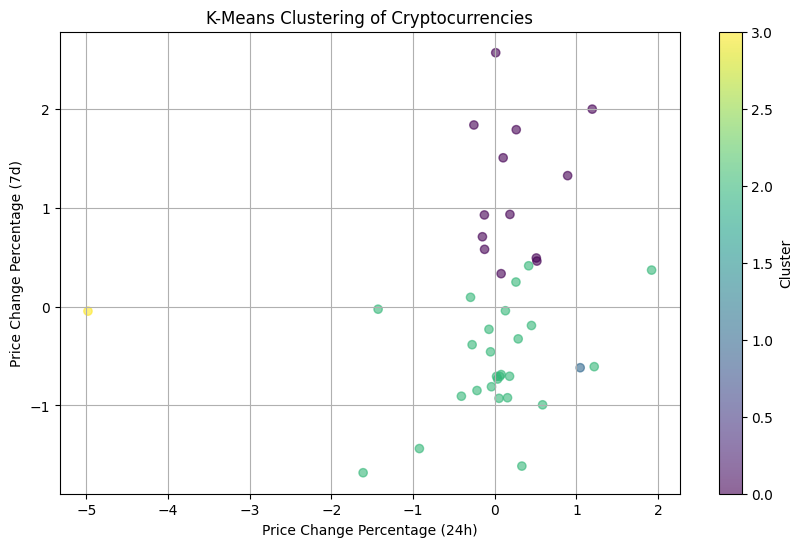

In [115]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

plt.figure(figsize=(10, 6))
plt.scatter(original_data_with_clusters['price_change_percentage_24h'],
            original_data_with_clusters['price_change_percentage_7d'],
            c=original_data_with_clusters['Cluster'],
            cmap='viridis',
            alpha=0.6)
plt.title('K-Means Clustering of Cryptocurrencies')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [116]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)


In [117]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_result = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame.
pca_result_df = pd.DataFrame(pca_result)

pca_result_df.sample(5)

0         1         2
17 -0.489015 -0.732719 -0.062543
14 -0.393352 -0.108192 -0.012756
9  -0.759014 -0.201200 -0.217653
36  4.792395  6.767679 -1.986985
38 -0.593142  0.021485  0.209911

In [118]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(total_explained_variance)


0.895031657030984


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [119]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca = PCA(n_components=4)
pca_result = pca.fit_transform(market_data_df)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(4)])

# Copy the crypto names from the original data
crypto_names = market_data_df.index.tolist()

# Set the coinid column as index
pca_df.index = crypto_names
sample_data = pca_df.sample(5)

# Display sample data
print("PCA DataFrame Sample:")
print(sample_data)


PCA DataFrame Sample:
                          PC1         PC2        PC3        PC4
wrapped-bitcoin   -341.672172  -51.088157  12.046052   8.485233
ethlend           7755.778366 -361.972320 -11.117604  -3.137262
tether            -402.614721 -118.710737  24.838397  -1.831882
ftx-token         -224.737127 -114.795270  23.570526 -11.475978
ethereum-classic  -389.140428 -116.155069   0.891223  11.140088


### Find the Best Value for k Using the PCA Data

In [120]:
# Create a list with the number of k-values to try (from 1 to 11)
k_values = list(range(1, 12))  # This creates a list [1, 2, ..., 11]

# Create an empty list to store the inertia values
inertia_values = []

# Output the lists to verify
print("K-values to try:", k_values)
print("Empty Inertia Values List:", inertia_values)

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


k_values = list(range(1, 12))


inertia_values = []


for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)


    kmeans.fit(pca_df)


    inertia_values.append(kmeans.inertia_)


print("Inertia Values:", inertia_values)



#Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Step 2: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Step 3: Display the DataFrame
print("Elbow Curve DataFrame:")
print(elbow_df)

K-values to try: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Empty Inertia Values List: []
Inertia Values: [69981055.10201973, 8190718.24973895, 2790416.957010535, 832812.3785268114, 434982.0643167089, 270132.1931859064, 211240.10207969957, 168721.0940213999, 134097.06270737073, 108453.02521364641, 78645.47123414277]
Elbow Curve DataFrame:
     k       inertia
0    1  6.998106e+07
1    2  8.190718e+06
2    3  2.790417e+06
3    4  8.328124e+05
4    5  4.349821e+05
5    6  2.701322e+05
6    7  2.112401e+05
7    8  1.687211e+05
8    9  1.340971e+05
9   10  1.084530e+05
10  11  7.864547e+04


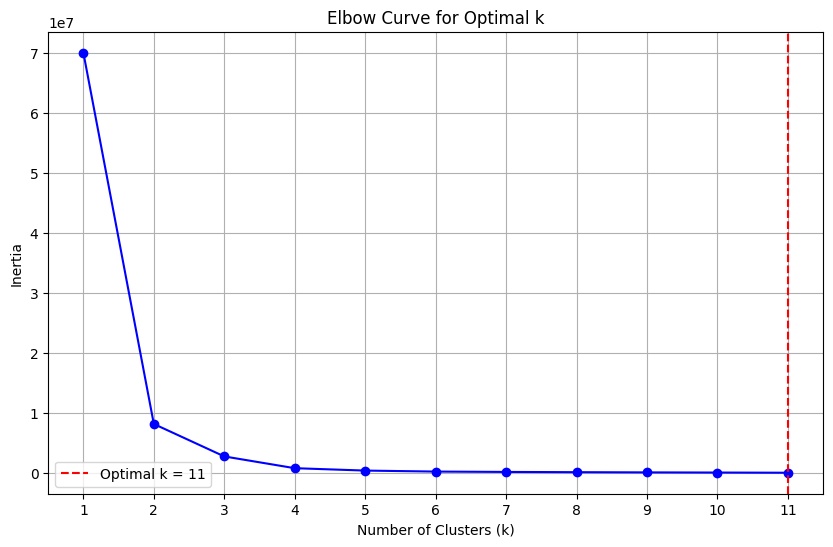

In [121]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-ticks to be the k-values
plt.grid()


optimal_k = elbow_df['k'][elbow_df['inertia'].idxmin()]
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()

# Show the plot
plt.show()


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO, because is it results to the lowest misclassification error.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [122]:
# Initialize the K-Means model using the best value for k

best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=42)

print(f"K-Means model initialized with n_clusters={best_k}.")


K-Means model initialized with n_clusters=4.


In [123]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

print("K-Means model fitted using PCA data.")


K-Means model fitted using PCA data.


In [124]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df)

# View the resulting array of cluster values.
print("Predicted Cluster Values:")
print(predicted_clusters)

# Print the resulting array of cluster values.
print("Predicted Cluster Values:")
print(predicted_clusters)


Predicted Cluster Values:
[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]
Predicted Cluster Values:
[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


In [125]:
kmeans_model.fit(pca_df)


predicted_clusters = kmeans_model.predict(pca_df)


pca_with_clusters = pca_df.copy()


pca_with_clusters['Cluster'] = predicted_clusters


sample_data = pca_with_clusters.sample(5)

# Output results
print("PCA DataFrame with Predicted Clusters Sample:")
print(sample_data)

PCA DataFrame with Predicted Clusters Sample:
                     PC1         PC2        PC3        PC4  Cluster
vechain      -128.539445   65.675378 -59.716008  -4.005969        0
okb          -255.261261 -124.797933  17.121792 -11.217788        0
cdai         -403.023491 -119.107827  24.449027  -3.731549        0
bitcoin-cash -382.429948 -103.431959  16.753073  24.303473        0
nem          -145.551343   37.211474  69.779081 -38.396254        0


In [126]:
# !pip install hvplot

In [127]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.

import hvplot.pandas


pca_with_clusters.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'Cluster']

# Now you can proceed with creating the scatter plot
scatter_plot = pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',  # Color by cluster
    title='PCA Scatter Plot',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    legend='top',
    height=400,
    width=600,
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

In [128]:
scaled_df

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain                         0.331280                   -1.614844   
usd-coin                                 0.034352                   -0.733026   
eos                                      0.155710                   -0.922491   
monero                                   0.262723                    1.792602   
tron                                     0.130050                   -0.041018   
tezos                                   -0.151583                    0.708196   
okb                                     -0.923203                   -1.437359   
stellar                                 -0.277543                   -0.385209   
cosmos                                  -0.255978                    1.840274   
cdai                                     0.180851                   -0.704931   
neo                                      0.286546                   -0.326301   
wrapped-bitcoin                          0.515453                    0.461843   
leo-token                                0.051758                   -0.928381   
huobi-token                             -0.052032                   -0.457229   
nem                                     -0.217984                   -0.849381   
binance-usd                              0.061339                   -0.706669   
iota                                     0.259097                    0.249508   
vechain                                  0.585089                   -0.994231   
zcash                                   -0.127467                    0.929119   
theta-token                             -1.612188                   -1.682027   
dash                                    -0.296940                    0.094763   
ethereum-classic                        -0.071312                   -0.229484   
ethlend                                 -4.981042                   -0.045178   
maker                                   -0.125168                    0.580730   
havven                                  -1.428574                   -0.025510   
omisego                                  1.919812                    0.370447   
celsius-degree-token                     1.045530                   -0.618328   
ontology                                -0.409044                   -0.906963   
ftx-token                                0.414711                    0.414044   
true-usd                                 0.078038                   -0.687745   
digibyte                                 1.217453                   -0.607714   

                      price_change_percentage_14d  \
coin_id                                             
bitcoin                                  0.772200   
ethereum                                 0.558692   
tether                                  -0.021680   
ripple                                   0.249458   
bitcoin-cash                             1.760610   
binancecoin                              0.800214   
chainlink                                1.101647   
cardano                                  0.648885   
litecoin

### Determine the Weights of Each Feature on each Principal Component

In [129]:
# Use the columns from the original scaled DataFrame as the index.

scaled_df = pd.DataFrame(scaled_df)

# Assuming 'coin_id' is a separate list/Series, reset index and add 'coin_id' column:
scaled_df = scaled_df.reset_index()  # Reset existing index
# scaled_df['coin_id'] = coin_id  # Assuming coin_id is available in your environment

# Step 1: Set 'coin_id' column as index
scaled_df.set_index('coin_id', inplace=True)

# Step 2: Display the updated DataFrame
print("DataFrame after setting 'coin_id' as index:")
print(scaled_df)

DataFrame after setting 'coin_id' as index:
                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                

#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
    

In [130]:
# Step 1: Analyze feature influence on each component
for i in range(scaled_df.shape[1]):  # Loop over each principal component
    strongest_positive = scaled_df.iloc[:, i].idxmax()  # Feature with max loading
    strongest_negative = scaled_df.iloc[:, i].idxmin()  # Feature with min loading
    print(f"\nPrincipal Component {i + 1}:")
    # Use .loc to access data by row index (coin_id) and column index (i)
    print(f"Strongest Positive Influence: {strongest_positive} ({scaled_df.loc[strongest_positive, scaled_df.columns[i]]:.4f})")
    print(f"Strongest Negative Influence: {strongest_negative} ({scaled_df.loc[strongest_negative, scaled_df.columns[i]]:.4f})")


Principal Component 1:
Strongest Positive Influence: omisego (1.9198)
Strongest Negative Influence: ethlend (-4.9810)

Principal Component 2:
Strongest Positive Influence: chainlink (2.5723)
Strongest Negative Influence: theta-token (-1.6820)

Principal Component 3:
Strongest Positive Influence: celsius-degree-token (2.9071)
Strongest Negative Influence: vechain (-2.2171)

Principal Component 4:
Strongest Positive Influence: celsius-degree-token (5.3515)
Strongest Negative Influence: ontology (-1.3932)

Principal Component 5:
Strongest Positive Influence: celsius-degree-token (4.7699)
Strongest Negative Influence: tezos (-0.9560)

Principal Component 6:
Strongest Positive Influence: ethlend (4.6324)
Strongest Negative Influence: cdai (-0.5511)

Principal Component 7:
Strongest Positive Influence: ethlend (6.0886)
Strongest Negative Influence: eos (-0.2963)
